# Part 1: Modeling Challenge

## Python Coding and Data Set

### Load in the data file and header file provided

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv("breast-cancer.csv", header=None)
headers = pd.read_table("field_names.txt", header=None)
data.columns=headers[0].values

In [2]:
data.sample(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
294,891716,B,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,...,13.50,17.48,88.54,553.7,0.1298,0.1472,0.05233,0.06343,0.2369,0.06922
196,875938,M,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,...,16.39,34.01,111.60,806.9,0.1737,0.3122,0.38090,0.16730,0.3080,0.09333
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
534,919537,B,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
210,881046502,M,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,...,23.24,27.84,158.30,1656.0,0.1178,0.2920,0.38610,0.19200,0.2909,0.05865


### Comment on any steps you might take to evaluate or transform the dataset.

Checking for null values

In [3]:
data.isna().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

- For the categorical values we will need to do some kind of encoding depending on the number of categories
- For the numrical values we might need to do some kind of normalization depending on the used mode and whether it's affected by it or not.

In [4]:
diagnosisMap={"M":1,"B":0}
data["diagnosis"].replace(diagnosisMap, inplace=True)

In [5]:
data.sample(10)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
568,92751,0,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
493,914101,0,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
211,8810528,0,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,...,13.300,24.99,85.22,546.3,0.12800,0.18800,0.14710,0.06913,0.2535,0.07993
229,881861,1,12.830,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.068610,...,15.200,30.15,105.30,706.0,0.17770,0.53430,0.62820,0.19770,0.3407,0.12430
186,874217,1,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
525,91805,0,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,...,9.473,18.45,63.30,275.6,0.16410,0.22350,0.17540,0.08512,0.2983,0.10490
416,905978,0,9.405,21.70,59.60,271.2,0.10440,0.06159,0.020470,0.012570,...,10.850,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304
96,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
334,897374,0,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,13.350,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207
358,9010333,0,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,...,9.981,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431


In [15]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

our data is not highly imbalanced so that's good

### Compute the mean and median smoothness and compactness for benign and malignant tumors

In [6]:
groupedData = data.groupby("diagnosis")
print ("Mean for smoothness")
smoothnessMean = groupedData["smoothness_mean"].mean()
print(smoothnessMean)
print ("Mean for compactness")
compactnessMean = groupedData["compactness_mean"].mean()
print(compactnessMean)

Mean for smoothness
diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64
Mean for compactness
diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64


In [7]:
print ("Median for smoothness")
smoothnessMedian = groupedData["smoothness_mean"].median()
print(smoothnessMedian)
print ("Median for compactness")
compactnessMedian = groupedData["compactness_mean"].median()
print(compactnessMedian)

Median for smoothness
diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64
Median for compactness
diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64


### Write a function to generate bootstrap samples of the data.

In [8]:
data.sample(100)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
28,852973,1,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,...,20.27,36.71,149.30,1269.0,0.16410,0.6110,0.6335,0.20240,0.4027,0.09876
328,8953902,1,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,...,19.28,30.38,129.80,1121.0,0.15900,0.2947,0.3597,0.15830,0.3103,0.08200
11,84610002,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.50,1299.0,0.13960,0.5609,0.3965,0.18100,0.3792,0.10480
551,923780,0,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,12.02,28.26,77.80,436.6,0.10870,0.1782,0.1564,0.06413,0.3169,0.08032
478,911685,0,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,...,12.40,21.90,82.04,467.6,0.13520,0.2010,0.2596,0.07431,0.2941,0.09180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,89143602,0,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,...,15.77,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
205,879523,1,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
65,859283,1,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,...,17.31,33.39,114.60,925.1,0.16480,0.3416,0.3024,0.16140,0.3321,0.08911
499,91485,1,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,...,23.86,30.76,163.20,1760.0,0.14640,0.3597,0.5179,0.21130,0.2480,0.08999


# Exploratory Analysis

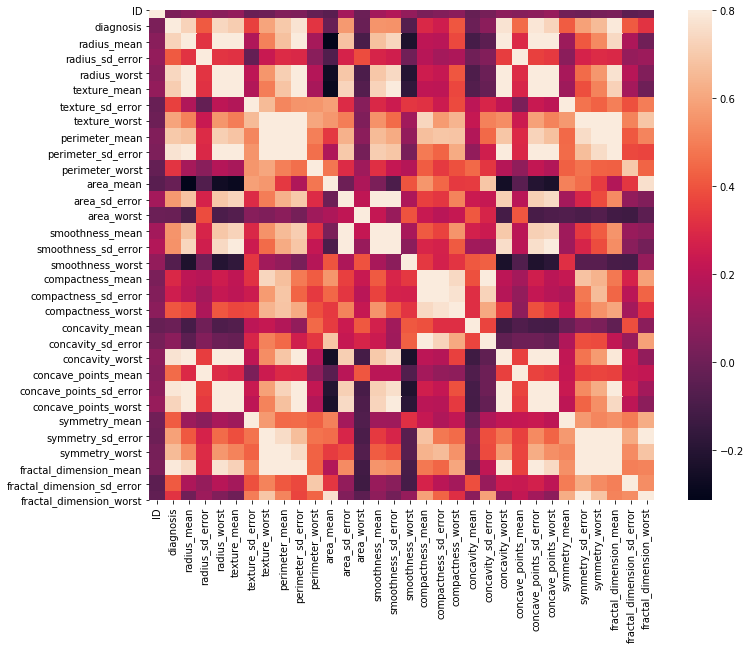

In [9]:
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [10]:
#Pick highest 3 features according to correlation analysis
corrmat["diagnosis"].sort_values(ascending=False)

diagnosis                     1.000000
fractal_dimension_mean        0.793566
concave_points_sd_error       0.782914
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_worst                  0.742636
concave_points_worst          0.733825
radius_mean                   0.730029
texture_mean                  0.708984
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error     

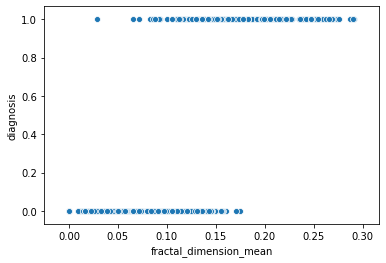

In [11]:
ax = sns.scatterplot(x="fractal_dimension_mean", y="diagnosis", data=data)

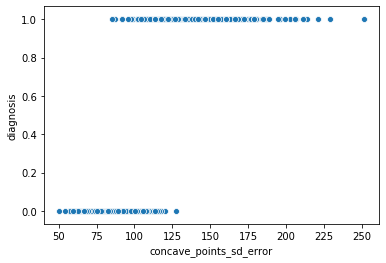

In [12]:
ax = sns.scatterplot(x="concave_points_sd_error", y="diagnosis", data=data)

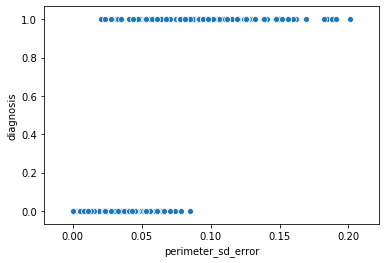

In [13]:
ax = sns.scatterplot(x="perimeter_sd_error", y="diagnosis", data=data)

So for the three features with the highest correlation with the target variable we can see that there's an obvious relation between them and the target variable. For all of them the more the value gets the more likely the tumor is Malignant.

# Modeling

## Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

features = data.drop(["diagnosis","ID"],axis=1)
target = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

predictions=logreg.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test,predictions)
metrics.auc(fpr, tpr)

c:\users\oadel\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9580740255486406

## XGBoost

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(verbosity = 1)
xgb.fit(X_train, y_train)

predictions=xgb.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test,predictions)
metrics.auc(fpr, tpr)

0.9580740255486406

## Feature Importance

In [42]:
np.sort(xgb.feature_importances_)[-6:]
temp = pd.Series(xgb.feature_importances_,index=features.columns)
sortedTemp = temp.sort_values(ascending=False)[:6]

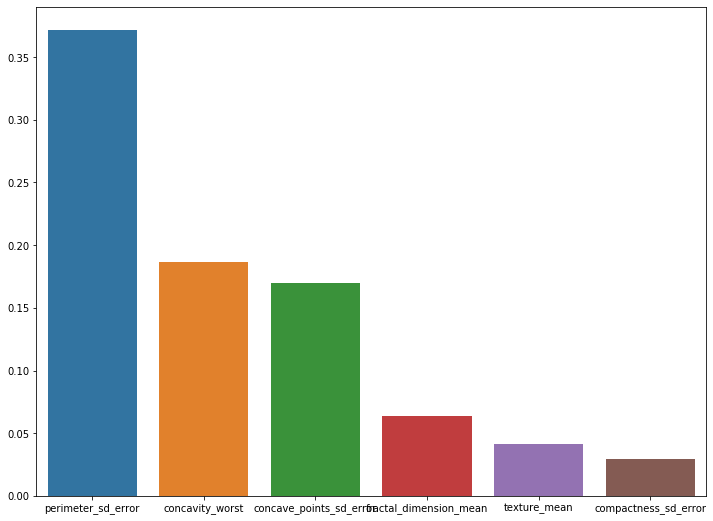

In [43]:
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(sortedTemp.index,sortedTemp.values)

# Explanation

## To Technical Audiences

- I didn't do extensive EDA, so there might be some insights that i'm missing.
- I didn't do any feature engineering so maybe i can do that to improve performance.
- I didn't do any hyper-parameters optimization for the models , so we can do that too.
- However an AUC of 0.958 indicates a very good model. ( A perfect model has an AUC of 1 as we know).

## To Non-Technical Audiences

- First I started by taking a look at a randomly picked sample from the dataset. Then i used isna() to check if there are any null values in our dataset (values that's missing). Then to have a quick insight of which features are good for our case, i calculated the correlation (a number indicating the relation between 2 variables, the higher the stronger the relation) between all the features and our target variable. Then i visualized it using heatmap. I then looked at the top 3 features using scatter plot, it was clear that the higher the value of these features the more likely that the tumor is malignant. Then i tried two classification models to make the predictions: Logistic regression & XGBoost. To my surprise they had the exact same score. I used a metric called the area under the ROC curve. Basically, the perfect model (that predicts all values right) has an AUC of 1, a random model has an AUC of 0.5. Our model Had an AUC of 0.958 so that's nearly a perfect model.

### Logistic regression:
Logistic Regression, also known as Logit Regression or Logit Model, is a mathematical model used in statistics to estimate (guess) the probability of an event occurring having been given some previous data. Logistic Regression works with binary data, where either the event happens (1) or the event does not happen (0).
### XGBoost:
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

# DSI Instructor Task: Part 2

## Student 1:
## Code

In general the code looks neat and well-commented.
There are just few comments i would like to give you to make it even better:
- cross_val_score function is no longer in module cross_validation, now it's in module model_selection. So you should edit your import statement.
- Try to use descriptive names like data instead of d, features instead of x1 and target instead of x2.
- Try not to import something multiple times as it's not useful. Also the train_test_split function is no longer part of cross_validation, it's now in module model_selection. Anyway you are not using it here so you don't need to import it at all.
- k-fold cross validation requires at least one train / test split. Use cv=2.
- Second parameter should be atleast 2D array to be used to predict the outcome.

## Methodology

You did a good job splitting the data into features and labels, then building your model and then you went to scoring.
There are some points you need to work on more though:
- Given data set has to be validated for missing, mistype or outlier before passing it to the model.
- You should always start with EDA before going straight to modelling.
- You should pick which features to use based on the EDA you did, not randomly.

## Conceptual Understanding

Getting a right sample data for training, testing and validtion and the correct usage of Exploratory Data Analysis technique to select the features are the critical task before building the ML model.

## Student 2:
## Code

In general the code looks neat and well-commented.
There are just few comments i would like to give you to make it even better:
- cross_val_score function is no longer in module cross_validation, now it's in module model_selection. So you should edit your import statement.
- Try to use descriptive names like features instead of x and target instead of y. Also note that you mixed up X & y, You need to swap them.
- k-fold cross validation requires at least one train / test split. Use cv=2.
- Second parameter should be atleast 2D array to be used to predict the outcome.

## Methodology

You did a good job splitting the data into features and labels, then building your model and then you went to scoring.
There are some points you need to work on more though:
- Given data set has to be validated for missing, mistype or outlier before passing it to the model.
- You should always start with EDA before going straight to modelling.
- You should pick which features to use based on the EDA you did, not randomly.

## Conceptual Understanding

Getting a right sample data for training, testing and validtion and the correct usage of Exploratory Data Analysis technique to select the features are the critical task before building the ML model.